# Prediction of Heart Disease 

Predicting a person's heart health using machine learning algorithms provided medical history of that person. The problem is tackled by breaking down the total procedure into 6 major steps:
 1. Define the Problem
 2. Gather the Tools
 3. Collect & Understand the Dataset
 4. Find the Best Machine Learning Model(s)
 5. Tune the Hyperparameters
 6. Evaluate the Model


## 1. Define the Problem
> Prepare a machine leanrning model to predict persons with heart disease based on the given set of clinical parameter describing the medical condition.


## 2. Gather the Tools
> The following tools are used to prepare the model 

In [56]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
from sklearn.utils._testing  import ignore_warnings
from sklearn.exceptions      import ConvergenceWarning, FitFailedWarning
warnings.filterwarnings("ignore", category = ConvergenceWarning)
warnings.filterwarnings("ignore", category = FitFailedWarning)

from sklearn.svm             import SVC
from sklearn.ensemble        import RandomForestClassifier
from sklearn.neighbors       import KNeighborsClassifier
from sklearn.linear_model    import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

from sklearn.metrics         import confusion_matrix
from sklearn.metrics         import plot_roc_curve
from sklearn.metrics         import ConfusionMatrixDisplay
from sklearn.metrics         import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics         import plot_roc_curve
from sklearn.metrics         import roc_auc_score

from joblib import dump

## 3. Collect & Understand the Dataset

> The original data came from the cleavland data from the UCI Machine Learning Repository, https://archive.ics.uci.edu/ml/datasets/heart+disease. However, there is also a version available in kaggle, https://www.kaggle.com/ronitf/heart-disease-uci.


> The data contains 14 attributes:
    
|S.No.| parameter| description |
|:-----:|:-------|:-------------|
|1.| age | age |
|2.| sex | sex |
|3.| cp | chest pain |
|4.| trestbps | resting blood pressure |
|5.| chol | serum cholestoral in mg/dl |
|6.| fbs | fasting blood sugar > 120 mg/d |
|7.| restecg | resting electrocardiographic results (values 0,1,2) |
|8.| thalach | maximum heart rate achieved |
|9.| exang | exercise induced angina |
|10.| oldpeak | ST depression induced by exercise relative to rest |
|11.| slope | the slope of the peak exercise ST segment |
|12.| ca | number of major vessels (0-3) colored by flourosopy |
|13.| thal | 3 = normal; 6 = fixed defect; 7 = reversable defect |
|14.| target | (the predicted attribute) |


In [2]:
# load the ddata
heart_disease = pd.read_csv('heart-disease.csv')

In [3]:
heart_disease.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
heart_disease.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


> * From the above table we can see that no data is missing, therefore, we do not need to deal with `NaN` values. 

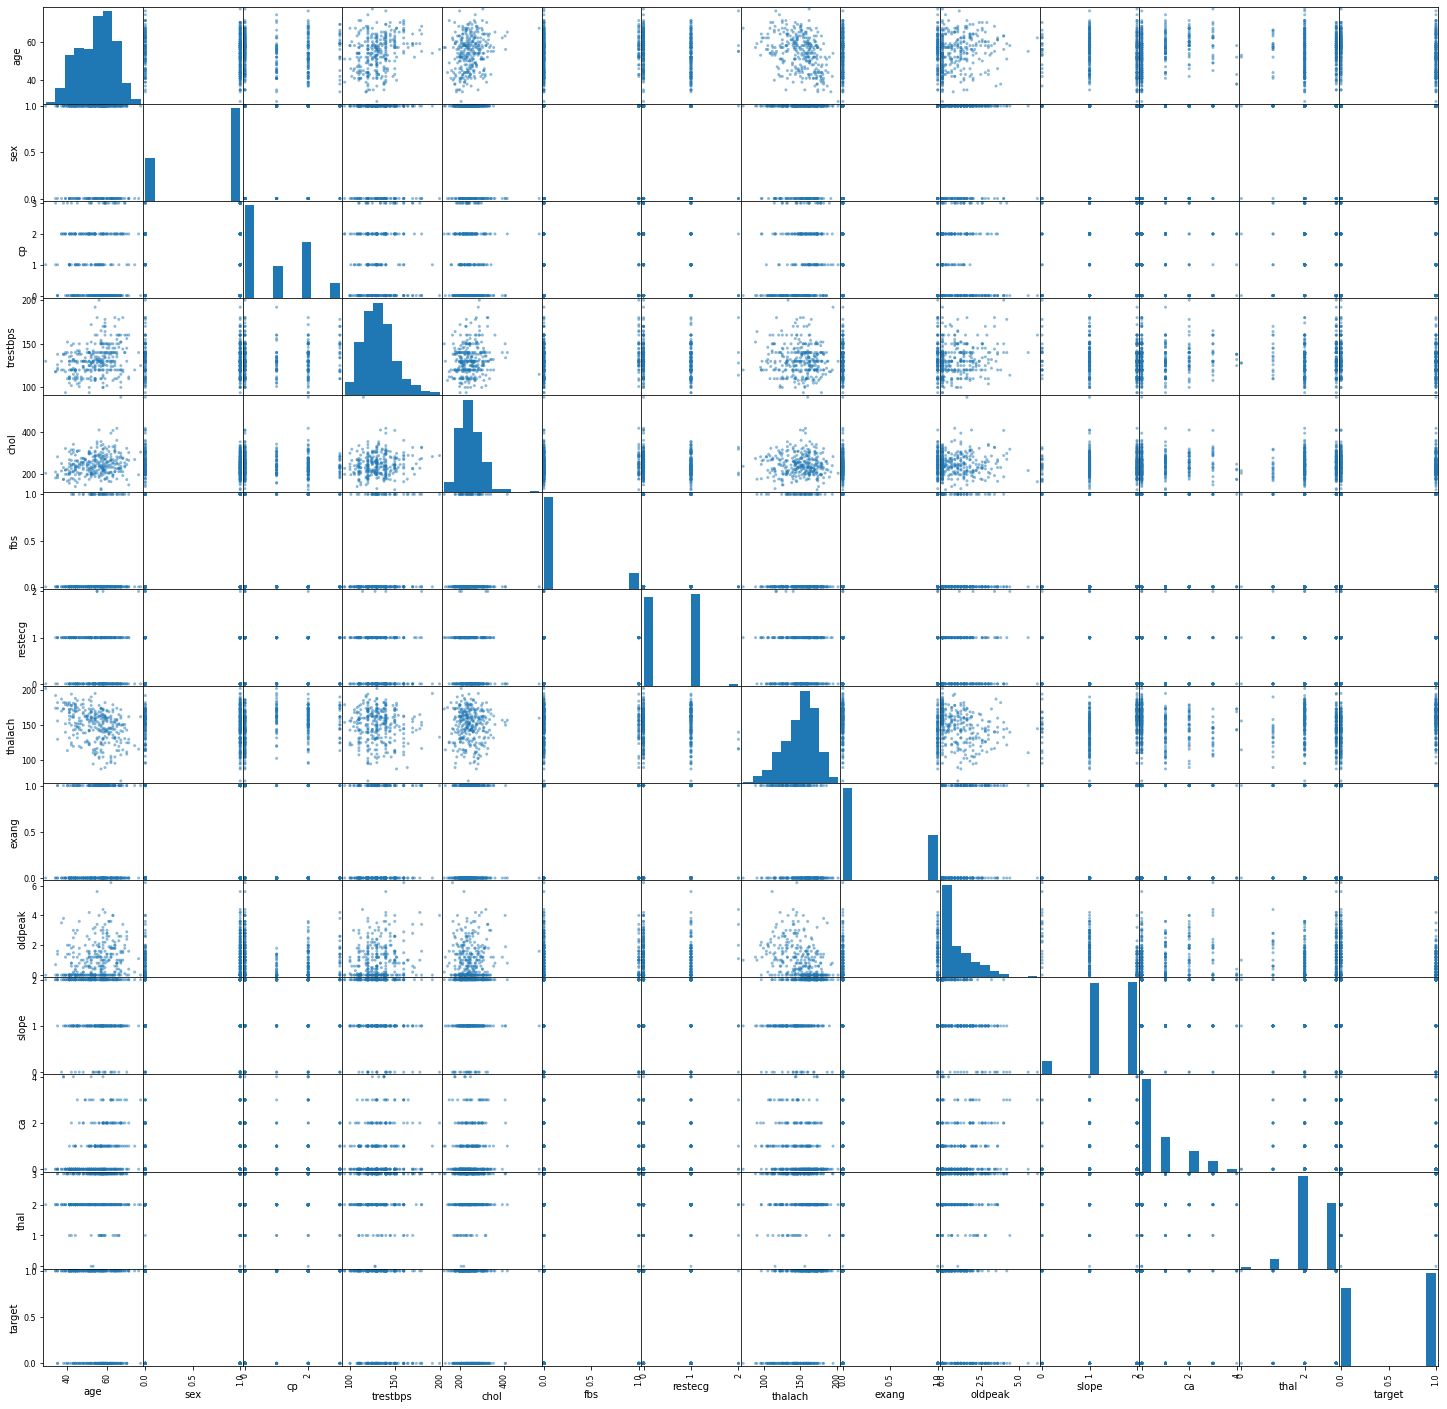

In [5]:
%matplotlib inline
# fig, ax = plt.subplots(figsize=(15,15))
ax = pd.plotting.scatter_matrix(heart_disease, figsize=(25,25));

> * The `scatter_matrix` plot is a nice way of getting an overview on the data corresponding to correlation among the attrubutes. However, it is quite complex to understand and make some preliminary predictions from these plots. Therefore, more thorough analysis methods are useful to get the insights.

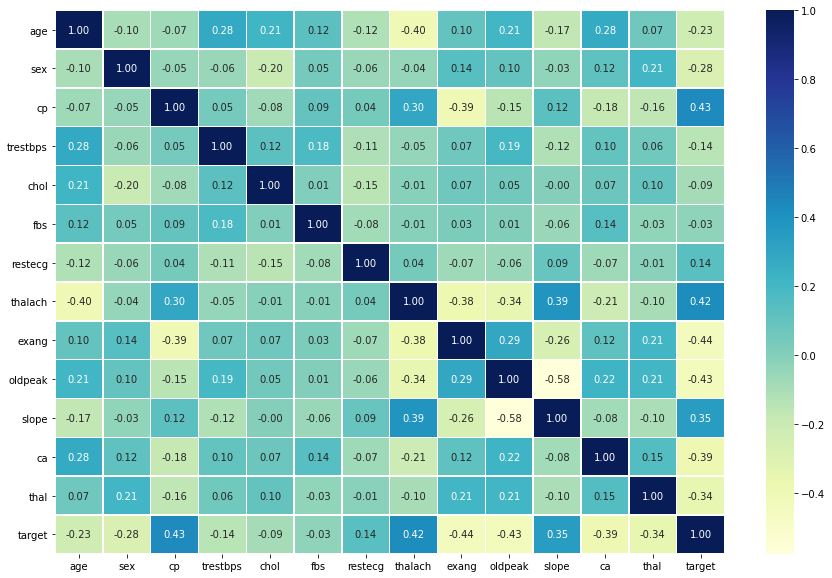

In [6]:
corr_matrix = heart_disease.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix, 
                 annot=True,
                 linewidths=0.5,
                 fmt='.2f',
                 cmap="YlGnBu")

> * Pandas `corr` matrix function is yet an another nice way to find the correlations among the attributes. As part of the primary analysis we can see quite a few correlations from the above figure. 
> * The `target`attribute has a positive correlation with `cp` (chest pain), `thalach` (maximum heart rate achieved), and `slope` (the slope of the peak exercise ST segment).
> * The `target`attribute has a negative correlation with `exang` (exercise induced angina), `oldpeak` (ST depression induced by exercise relative to rest), `ca` (number of major vessels (0-3) colored by flourosopy), and `thal`. 
> * It seems that the `target` attribute is somewhat less dependent on `fbs` and `chol`. 

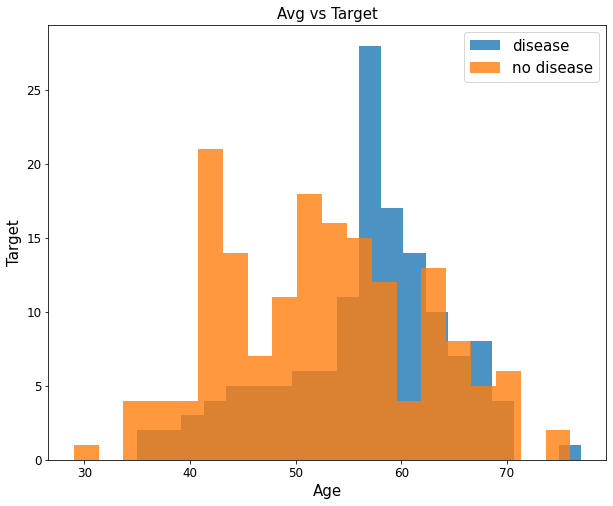

In [7]:
fig, ax = plt.subplots(figsize=(10,8))
ax.hist(heart_disease[heart_disease.target==0].age, bins=20, alpha=0.8, label='disease')
ax.hist(heart_disease[heart_disease.target==1].age, bins=20, alpha=0.8, label='no disease')
#ax.scatter(heart_disease.age, heart_disease.target)
# ax.set(title='Age vs Target', xlabel='Age', ylabel='Target')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel(xlabel='Age',fontsize=15)
plt.ylabel(ylabel='Target', fontsize=15)
plt.title('Avg vs Target', fontsize=15)
plt.legend(fontsize=15);

> * It is clearly visible from the above figure that people with `age` above 55 has higher chanches to have heart disease than below 45

### Preparing the Data for Model Fitting

In [8]:
X = heart_disease.drop('target', axis=1)
y = heart_disease.target

In [9]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
dtypes: float64(1), int64(12)
memory usage: 30.9 KB


In [10]:
X.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [11]:
y.head(5)

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

## 4. Find the Best Machine Learning Model(s)

### Selection of Model(s)


> **According to scikit-learn, the following figure will help us in choosing the right estimator(s)**
![choosing the right estimator](ml_map.png)

> source: https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

> Based on the current data, four models have been chosen to test on.
Following are the models and naming conventions used through out this project

>**`SVC`** : Support Vector Classifier <br>
**`RFC`** : Random Forest Classifier <br>
**`KNC`** : K Neighbors Classifier <br>
**`LR `**  : Logistic Regression <br>


In [12]:
# split the data into train and test purposes
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=774)

**`SVC`**

In [13]:
model_SVC = SVC()
model_SVC.fit(X_train, y_train)
model_SVC_score = model_SVC.score(X_test, y_test)
model_SVC_score

0.6721311475409836

**`RFC`**

In [14]:
model_RFC = RandomForestClassifier()
model_RFC.fit(X_train, y_train)
model_RFC_score = model_RFC.score(X_test, y_test)
model_RFC_score

0.819672131147541

**`KNC`**

In [15]:
model_KNC = KNeighborsClassifier()
model_KNC.fit(X_train, y_train)
model_KNC_score = model_KNC.score(X_test, y_test)
model_KNC_score

0.6557377049180327

**`LR`**

In [16]:
model_LR = LogisticRegression()
model_LR.fit(X_train, y_train)
model_LR_score = model_LR.score(X_test, y_test)
model_LR_score

0.8032786885245902

### Keep the models in a pipeline to access them with ease 

In [17]:
initial_models = {'SVC': SVC(),
                  'RFC': RandomForestClassifier(), 
                  'KNC': KNeighborsClassifier(),
                  'LR' : LogisticRegression()}

def train_the_models(initial_models, X_train, y_train):
    np.random.seed(42)
    models={}
    for name, model in initial_models.items():
        models[name] = model.fit(X_train, y_train)
    return models

def get_accuracy_score(models, X, y):
    acc_score={}
    for name, model in models.items():
        acc_score[name] = model.score(X, y)
    return pd.DataFrame(acc_score, index=['test_accuracy']).T

In [18]:
# train the models

trained_models_b4_hp_tuning = train_the_models(initial_models, X_train, y_train)

In [19]:
# get the score
test_scores_b4_hp_tuning_df = get_accuracy_score(trained_models_b4_hp_tuning, X_test, y_test)
test_scores_b4_hp_tuning_df

,test_accuracy
SVC,0.672131
RFC,0.836066
KNC,0.655738
LR,0.803279


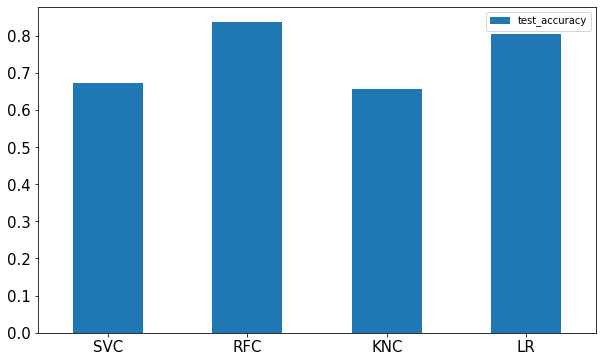

In [20]:
test_scores_b4_hp_tuning_df.plot(kind='bar', figsize=(10,6), fontsize=15)
plt.xticks(rotation=0);

> * It seems that Random Forest Classifier performs the best out of the four models.
> * The Logistic Regression and Support Vector Machine Classifier comes next.
> * Kneighbor Classifier seems to be the least performer with the default hyper parameters.
> * Sofar, `RFC` is the best and has a score around 0.8

### Let's use cross validation to compute the scores 

In [21]:
def get_cross_val_scores(models, X, y, index='accuracy'):
    crs_val_scores={}
    for name, model in models.items():
        crs_val_scores[name] = np.mean(cross_val_score(model, X, y, cv=5, scoring='accuracy'))
    return pd.DataFrame(crs_val_scores, index=[index]).T

In [22]:
total_cv_scores_b4_hp_tuning_df = get_cross_val_scores(trained_models_b4_hp_tuning, X, y, 'total_accuracy')
total_cv_scores_b4_hp_tuning_df

,total_accuracy
SVC,0.643497
RFC,0.811694
KNC,0.643880
LR,0.824863


In [23]:
test_cv_scores_b4_hp_tuning_df = get_cross_val_scores(trained_models_b4_hp_tuning, X_test, y_test, 'test_accuracy')
test_cv_scores_b4_hp_tuning_df

,test_accuracy
SVC,0.639744
RFC,0.817949
KNC,0.669231
LR,0.817949


Text(0.5, 1.0, 'Test Data')

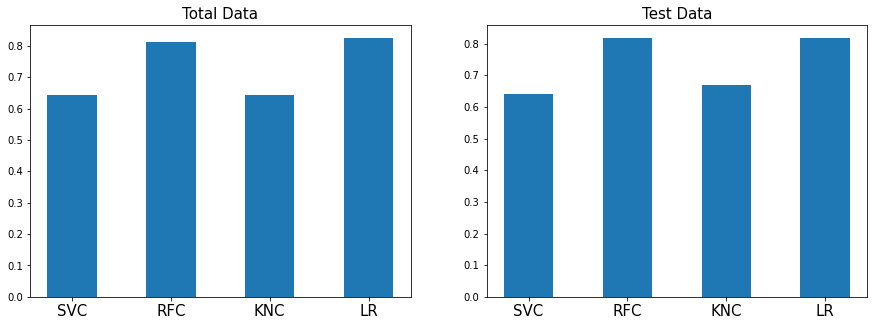

In [24]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,5))

plt.sca(ax1)
ax1 = plt.bar(total_cv_scores_b4_hp_tuning_df.index, total_cv_scores_b4_hp_tuning_df.total_accuracy, width=0.5)
plt.xticks(rotation=0, fontsize=15);
plt.title('Total Data', fontsize=15)

plt.sca(ax2)
ax2 = plt.bar(test_cv_scores_b4_hp_tuning_df.index, test_cv_scores_b4_hp_tuning_df.test_accuracy, width=0.5)
plt.xticks(rotation=0, fontsize=15);
plt.title('Test Data', fontsize=15)

In [25]:
pd.concat([total_cv_scores_b4_hp_tuning_df.T, test_cv_scores_b4_hp_tuning_df.T]).T

,total_accuracy,test_accuracy
SVC,0.643497,0.639744
RFC,0.811694,0.817949
KNC,0.643880,0.669231
LR,0.824863,0.817949


> * The mean accuracy of the cross validation shows a better score than without the cross validation, however, since the test data set is very small, we need to think about it before start to consider these values
> * Let's tune the hyperparameters and see 

## 5. Tune the Hyperparameters

#### Let's try improving the models by tunig their `hyperparameters`

> Let's use the follwoing two methods to narrow down for the best `hyperparameters` set:

> 1. RandomizedSearchCV
> 2. GridSearchCV

### RandomizedSearchCV


> * Let's see the default hyperparameters

In [26]:
print(model_SVC)
print(model_RFC)
print(model_KNC)
print(model_LR)

SVC()
RandomForestClassifier()
KNeighborsClassifier()
LogisticRegression()


In [27]:
# prepare the grid parameters
svc_grid = {'kernel'   :['linear', 'poly', 'rbf', 'sigmoid'],
            'degree'   : np.arange(1,6,1),
            'coef0'    : [0, 1, 2, 3, 10],
            'max_iter' :[-1, 100, 500, 1000, 5000, 10000]}

rfc_grid = {'n_estimators'      : np.arange(100, 1000, 100),
            'max_depth'         : [None, 3, 5, 10],
            'min_samples_split' : np.arange(2, 10, 1),
            'min_samples_leaf'  : np.arange(1, 5, 1)}

knc_grid = {'n_neighbors':np.arange(5, 16, 1)}

lr_grid  = {'penalty': ['l1', 'l2'],
            'C': np.arange(1, 10, 1),
            'solver': ['lbfgs','liblinear'],
            'max_iter': [100, 1000, 2000, 5000, 10000, 50000]}

In [28]:
# rs_cv stands for RandomizedSearchCV
rs_cv_model_grids = {'SVC':[SVC(),                    svc_grid],
                     'RFC':[RandomForestClassifier(), rfc_grid],
                     'KNC':[KNeighborsClassifier(),   knc_grid],
                     'LR' :[LogisticRegression(),     lr_grid]}

n_iters = {'SVC': 30,
           'RFC': 30,
           'KNC': 9,
           'LR':  9}

def hp_tuning_with_rs_cv(rs_cv_model_grids, X_train, y_train):
    rs_cv_models = {}
    for name, model_grid in rs_cv_model_grids.items():
        model = RandomizedSearchCV(model_grid[0],
                                   param_distributions=model_grid[1],
                                   cv=5,
                                   n_iter=n_iters[name],
                                   verbose=True,
                                   random_state=42)
        
        model.fit(X_train, y_train)
        rs_cv_models[name] = model
    return rs_cv_models

In [29]:
rs_cv_models = hp_tuning_with_rs_cv(rs_cv_model_grids, X_train, y_train )

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Fitting 5 folds for each of 9 candidates, totalling 45 fits
Fitting 5 folds for each of 9 candidates, totalling 45 fits


In [30]:
rs_cv_models

{'SVC': RandomizedSearchCV(cv=5, estimator=SVC(), n_iter=30,
                    param_distributions={'coef0': [0, 1, 2, 3, 10],
                                         'degree': array([1, 2, 3, 4, 5]),
                                         'kernel': ['linear', 'poly', 'rbf',
                                                    'sigmoid'],
                                         'max_iter': [-1, 100, 500, 1000, 5000,
                                                      10000]},
                    random_state=42, verbose=True),
 'RFC': RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=30,
                    param_distributions={'max_depth': [None, 3, 5, 10],
                                         'min_samples_leaf': array([1, 2, 3, 4]),
                                         'min_samples_split': array([2, 3, 4, 5, 6, 7, 8, 9]),
                                         'n_estimators': array([100, 200, 300, 400, 500, 600, 700, 800, 900])},
                   

In [31]:
# get the best and test scores after tuning with Randomized Search CV
rs_cv_scores = {}
for name, model in rs_cv_models.items():
    rs_cv_scores[name] = [model.best_score_,model.score(X_test, y_test)]
rs_cv_train_and_test_scores_df = pd.DataFrame(rs_cv_scores, index=['train', 'test']).T
rs_cv_train_and_test_scores_df

,train,test
SVC,0.813861,0.852459
RFC,0.838605,0.836066
KNC,0.656803,0.655738
LR,0.809524,0.819672


In [32]:
rs_cv_models['SVC'].best_params_

{'max_iter': -1, 'kernel': 'linear', 'degree': 4, 'coef0': 0}

In [33]:
rs_cv_models['RFC'].best_params_

{'n_estimators': 200,
 'min_samples_split': 7,
 'min_samples_leaf': 2,
 'max_depth': 5}

In [34]:
rs_cv_models['KNC'].best_params_

{'n_neighbors': 5}

In [35]:
rs_cv_models['LR'].best_params_

{'solver': 'liblinear', 'penalty': 'l2', 'max_iter': 5000, 'C': 1}

### GridSearchCV

> * Here, we can potentially tune our hyperparameters based on the Randomized Search CV results but since the data set is very small, I am going to check all the combinations of parameters as provided in Randomized Search CV

In [36]:
# prepare grid parameters
svc_grid = {'kernel'   :['linear', 'poly', 'rbf', 'sigmoid'],
            'degree'   : np.arange(1,6,1),
            'coef0'    : [0, 1, 2, 3, 10],
            'max_iter' :[-1, 100, 500, 1000, 5000, 10000]}

rfc_grid = {'n_estimators'      : np.arange(100, 1000, 100),
            'max_depth'         : [None, 3, 5, 10],
            'min_samples_split' : np.arange(2, 10, 1),
            'min_samples_leaf'  : np.arange(1, 5, 1)}

knc_grid = {'n_neighbors':np.arange(5, 16, 1)}

lr_grid  = {'penalty': ['l1', 'l2'],
            'C': np.arange(1, 10, 1),
            'solver': ['lbfgs','liblinear'],
            'max_iter': [100, 1000, 2000, 5000, 10000, 50000]}

In [37]:
gs_cv_model_grids = {'SVC':[SVC(),                    svc_grid],
                     'RFC':[RandomForestClassifier(), rfc_grid],
                     'KNC':[KNeighborsClassifier(),   knc_grid],
                     'LR' :[LogisticRegression(),     lr_grid]}

def hp_tuning_with_gs_cv(gs_cv_model_grids, X_train, y_train):
    gs_cv_models = {}
    for name, model_grid in gs_cv_model_grids.items():
        np.random.seed(42)
        model = GridSearchCV(model_grid[0],
                             param_grid=model_grid[1],
                             cv=5,
                             verbose=1,
                             scoring='accuracy')
        model.fit(X_train, y_train)
        gs_cv_models[name] = model
    return gs_cv_models

In [38]:
# fit the models
gs_cv_models = hp_tuning_with_gs_cv(gs_cv_model_grids, X_train, y_train)


Fitting 5 folds for each of 600 candidates, totalling 3000 fits
Fitting 5 folds for each of 1152 candidates, totalling 5760 fits
Fitting 5 folds for each of 11 candidates, totalling 55 fits
Fitting 5 folds for each of 216 candidates, totalling 1080 fits


/home/sudheer/.local/lib/python3.6/site-packages/sklearn/model_selection/_search.py:921: UserWarning: One or more of the test scores are non-finite: [       nan 0.80960884 0.80952381 0.80952381        nan 0.80960884
 0.80952381 0.80952381        nan 0.80960884 0.80952381 0.80952381
        nan 0.80960884 0.80952381 0.80952381        nan 0.80960884
 0.80952381 0.80952381        nan 0.80960884 0.80952381 0.80952381
        nan 0.80960884 0.80535714 0.80544218        nan 0.80960884
 0.80136054 0.80544218        nan 0.80960884 0.80136054 0.80544218
        nan 0.80960884 0.80136054 0.80544218        nan 0.80960884
 0.80136054 0.80544218        nan 0.80960884 0.80136054 0.80544218
        nan 0.80544218 0.80127551 0.80544218        nan 0.80544218
 0.80136054 0.80544218        nan 0.80544218 0.80136054 0.80544218
        nan 0.80544218 0.80136054 0.80544218        nan 0.80544218
 0.80136054 0.80544218        nan 0.80544218 0.80136054 0.80544218
        nan 0.80544218 0.80544218 0.80544218   

In [39]:
# Better to save the obtained best parameters
# 1. SVC : {'coef0': 0, 'degree': 1, 'kernel': 'linear', 'max_iter': -1}
# 2. RFC : {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 8, 'n_estimators': 100}
# 3. KNC : {'n_neighbors': 5}
# 4. LR  : {'C': 1, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}

In [40]:
# get the best and test scores
gs_cv_scores = {}
for name, model in gs_cv_models.items():
    gs_cv_scores[name] = [model.best_score_,model.score(X_test, y_test)]
gs_cv_train_and_test_scores_df = pd.DataFrame(gs_cv_scores, index=['train', 'test']).T
gs_cv_train_and_test_scores_df

,train,test
SVC,0.813861,0.852459
RFC,0.851020,0.836066
KNC,0.656803,0.655738
LR,0.809609,0.852459


> *  Let's compare the scores obtained for the test data by the models with 
>    1. Default parameters
>    2. Randomized Search CV parameters
>    3. Grid Search CV parameters

In [41]:
#pd.concat([test_scores_b4_hp_tuning_df,rs_cv_train_and_test_scores_df.test, gs_cv_train_and_test_scores_df.test], axis=1, names=['default', 'RS_CV', 'GS_CV'])
model_comparison_df = test_scores_b4_hp_tuning_df.join(rs_cv_train_and_test_scores_df.test)
model_comparison_df.rename(columns={'test_accuracy':'default', 'test':'rs_cv'}, inplace=True)
model_comparison_df = model_comparison_df.join(gs_cv_train_and_test_scores_df.test)
model_comparison_df.rename(columns={'test':'gs_cv'}, inplace=True)
model_comparison_df

,default,rs_cv,gs_cv
SVC,0.672131,0.852459,0.852459
RFC,0.836066,0.836066,0.836066
KNC,0.655738,0.655738,0.655738
LR,0.803279,0.819672,0.852459


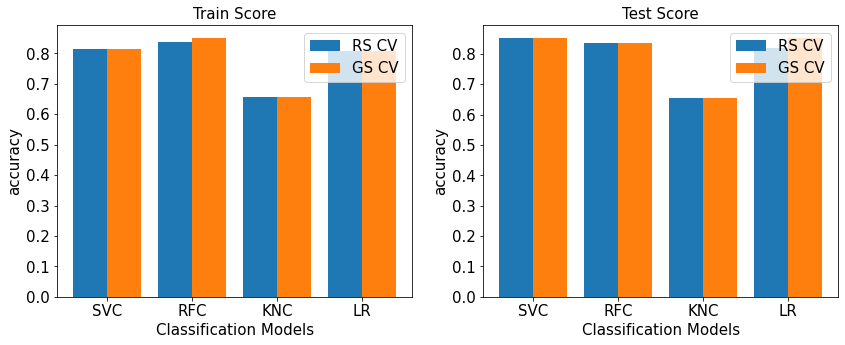

In [42]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(14,5))

ax1.bar([1.1,3.1,5.1,7.1],rs_cv_train_and_test_scores_df.train, label='RS CV')
ax1.bar([1.9,3.9,5.9,7.9],gs_cv_train_and_test_scores_df.train, label='GS CV')
ax1.set_title('Train Score', fontsize=15)

plt.sca(ax1)
plt.xticks([1.5,3.5,5.5,7.5], gs_cv_train_and_test_scores_df.index,rotation=0, fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Classification Models', fontsize=15)
plt.ylabel('accuracy', fontsize=15)
plt.legend(fontsize=15);


ax2.bar([1.1,3.1,5.1,7.1],rs_cv_train_and_test_scores_df.test, label='RS CV')
ax2.bar([1.9,3.9,5.9,7.9],gs_cv_train_and_test_scores_df.test, label='GS CV')
ax2.set_title('Test Score', fontsize=15)
plt.sca(ax2)
plt.xticks([1.5,3.5,5.5,7.5], gs_cv_train_and_test_scores_df.index,rotation=0, fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Classification Models', fontsize=15)
plt.ylabel('accuracy', fontsize=15)
plt.legend(fontsize=15);

The above plot shows the accury score obtained by the optimized classification models after hyper tuning with RandomizedSearchCV and GridSearchCV on the train (left) and test (right) data sets

> * Here, we can make couple of points
>    1. Both the `Support Vector Machine Classifier` and `Logistic Regression` performed best on the test data set
>    2. Very next to the above two, `Random Forest Classifier` aswel performed well on the test data set
>    3. `KNeighbors Classifier` is the least perfomed model on the test data set
>    4. In the case of `RFC`, a better test score was obtained when searched with *Randomized Search CV*, however, a lower test score was resulted after finding the parameters with *Grid Seach CV*, this is a kind of descrepance. Let's have a look at the best parameters obtained with these two search models and solve the descrepance.

In [43]:
# best parameters obtained for RFC model after randomized search CV
rs_cv_models['RFC'].best_params_

{'n_estimators': 200,
 'min_samples_split': 7,
 'min_samples_leaf': 2,
 'max_depth': 5}

In [44]:
# best parameters obtained for RFC model after Grid Search CV
gs_cv_models['RFC'].best_params_

{'max_depth': None,
 'min_samples_leaf': 4,
 'min_samples_split': 8,
 'n_estimators': 100}

> * It is clear that the two search methods yielded different `max_depth`, `n_estimators`, and `min_samples_split` hyperparameter values

In [45]:
# best score after randomized search CV
rs_cv_models['RFC'].best_score_

0.8386054421768707

In [46]:
# best score after Grid search CV
gs_cv_models['RFC'].best_score_

0.8510204081632653

> * When we see the scores on the train data the Grid Search CV has obtained the best hyperparameters though these parameters produced a slightly lower score on the test data
> * Let's also have a look on the other metrics before making a conclustion on the best model

### Let's first save the best models

In [47]:
final_models = {}

for name, model in gs_cv_models.items():
    best_prms = model.best_params_
    new_model = model.estimator
    new_model.set_params(**best_prms)
    new_model.fit(X_train, y_train)
    final_models[name] = new_model

## 6. Evaluate the Model

> Let's use the following metrics to evaluate the matrix towards selecting the best model

> 1. Confusion Matrix
> 2. Accuracy Score
> 3. Precision Score
> 4. Recall Score
> 5. F1 Score
> 6. ROC Curve
> 7. Cross Validation Score
> 8. Feature Importance

## Confusion Matrix

In [48]:
conf_matrix = {}
def compute_confusion_matrix(models, X_test, y_test):
    for name, model in models.items():
        conf_matrix[name] = confusion_matrix(y_test, model.predict(X_test))
    return conf_matrix

In [49]:
conf_matrix = compute_confusion_matrix(final_models, X_test, y_test)
conf_matrix

{'SVC': array([[17,  5],
        [ 4, 35]]),
 'RFC': array([[17,  5],
        [ 5, 34]]),
 'KNC': array([[13,  9],
        [12, 27]]),
 'LR': array([[17,  5],
        [ 4, 35]])}

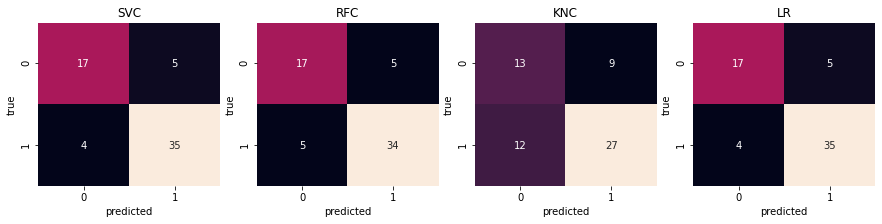

In [50]:
%matplotlib inline

fig, ax = plt.subplots(1,4, figsize=(15, 3))
n=0
for name, model in conf_matrix.items():
    plt.sca(ax[n])
    ax[n] = sns.heatmap(conf_matrix[name], annot=True, cbar=False)
    plt.title(name)
    plt.xlabel('predicted')
    plt.ylabel('true')
    n=n+1
    # ConfusionMatrixDisplay(conf_matrix[name]).plot()

## Comparison of accuracy, prescision, recall and f1 scores

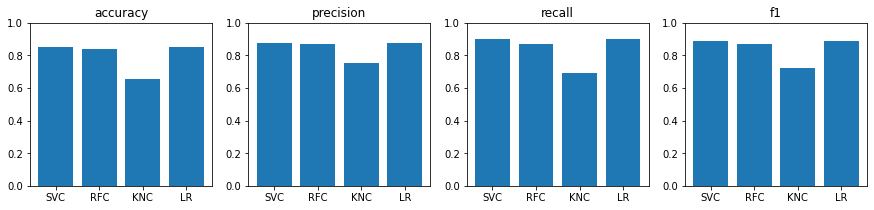

In [51]:
scoring_methods = {0:accuracy_score, 1:precision_score, 2: recall_score, 3: f1_score}
scoring_method_names = {0:'accuracy', 1:'precision', 2:'recall', 3:'f1'}
fig, ax = plt.subplots(1,4, figsize=(15,3))
for i, scoring_method in scoring_methods.items():
    data={}
    for name, model in final_models.items():
        data[name] = scoring_method(y_test, model.predict(X_test))
        #data[name] = np.mean(cross_val_score(model, X, y, cv=5, scoring=scoring_method_names[i]))
        #print(f'{scoring_method(y_test, model.predict(X_test)):.2f}')
    ax[i].bar(data.keys(),data.values())
    ax[i].set_title(scoring_method_names[i])
    ax[i].set_ylim([0.0,1.0])

## ROC curve and Area Under ROC curve

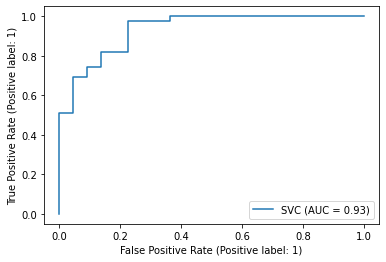

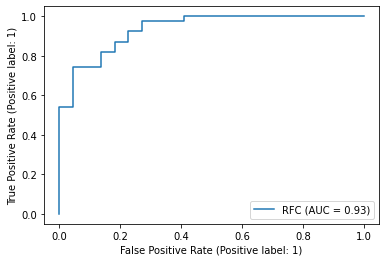

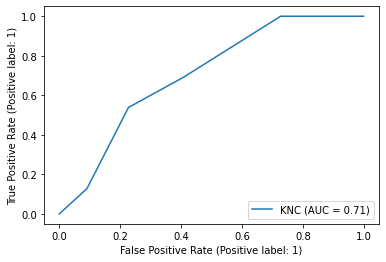

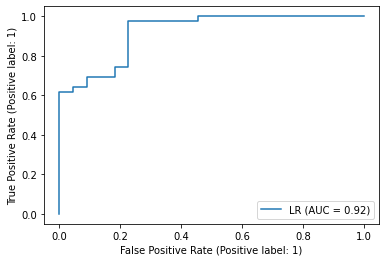

In [52]:
for name, model in final_models.items():
    plot_roc_curve(model, X_test, y_test, name=name)

## Cross Validation Score

In [53]:
get_cross_val_scores(final_models, X_test, y_test)

,accuracy
SVC,0.784615
RFC,0.833333
KNC,0.669231
LR,0.817949


> * Basaed on the cross validation score, Random Forest Classifier has a better performance among the four models with an accuracy score of 0.84

## Feature Importance

The features those contributed more for predicting the outcome in the current form of the model

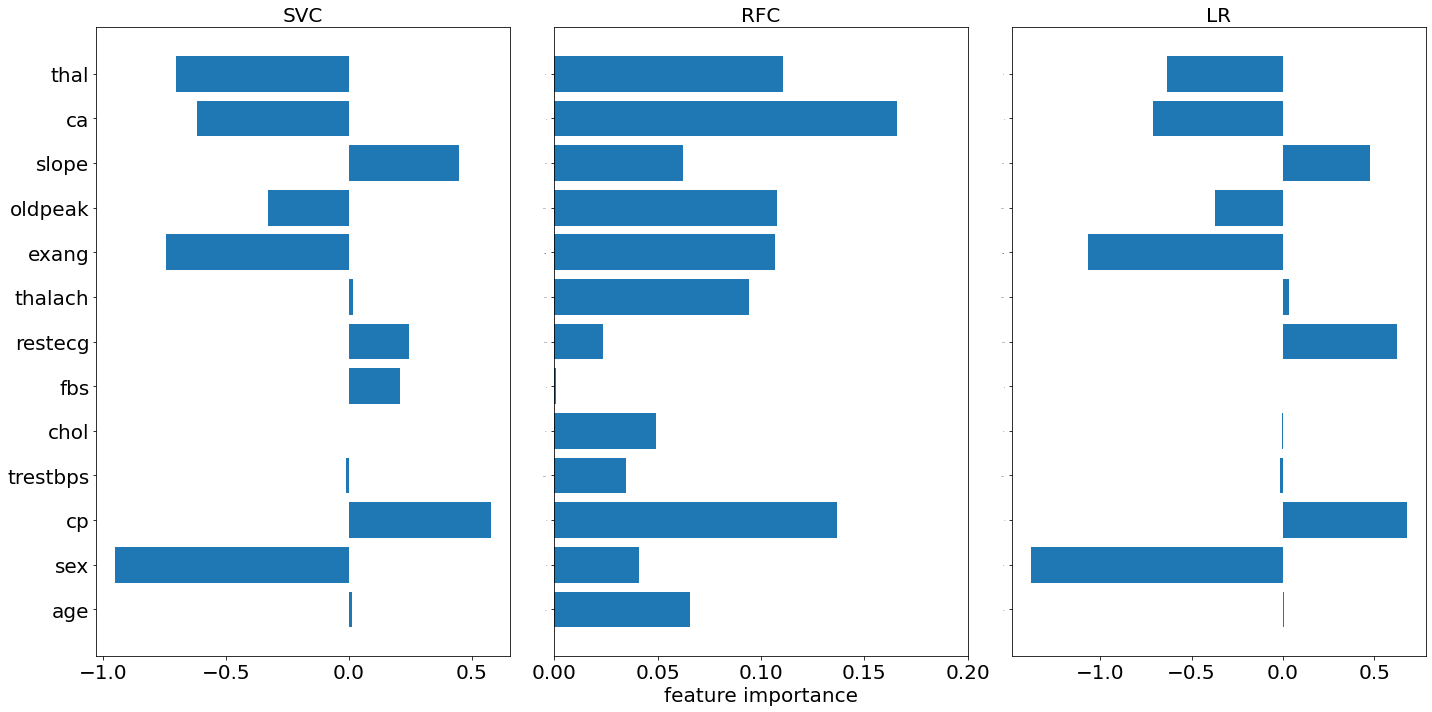

In [54]:
#plt.plot(list(zip(X.columns, final_models['SVC'].coef_[0,:])))
fig, ax = plt.subplots(1,3, figsize=(20,10))
n=0
prnt_yticks=True
fz1=20
fz2=20
for name, model in final_models.items():
    if name in ['SVC', 'LR']:
        plt.sca(ax[n])
        ax[n].barh(X.columns,model.coef_[0,:])
        plt.yticks(fontsize=fz2)
        plt.xticks(np.arange(-1,1,0.5),fontsize=fz1)
        fz2=0
        plt.title(name, fontsize=fz1)
        n=n+1
    elif name == 'RFC':
        plt.sca(ax[n])
        ax[n].barh(X.columns,model.feature_importances_)
        plt.xlabel('feature importance', fontsize=fz1)
        plt.yticks(fontsize=fz2)
        plt.xticks(np.arange(0,0.21,0.05),fontsize=fz1)
        plt.title(name, fontsize=fz1)
        n=n+1
        
plt.tight_layout()

> * From the feature importance, one can notice that `thal`, `ca`, `exang`, `cp`, and `sex` are the important features for predicting a persons heart health by using the above machine learning models

# Let's save the models

In [55]:
dump(final_models['SVC'], filename='final_SVC_model.joblib')
dump(final_models['RFC'], filename='final_RFC_model.joblib')
dump(final_models['KNC'], filename='final_KNC_model.joblib')
dump(final_models['LR'], filename='final_LR_model.joblib')

['final_LR_model.joblib']

# Additional Info

### Following packages are used <br>

cycler==0.10.0 <br>
joblib==1.0.1 <br>
kiwisolver==1.3.1 <br>
matplotlib==3.3.4 <br>
numpy==1.19.5 <br>
pandas==1.1.5 <br>
Pillow==8.2.0 <br>
pkg-resources==0.0.0 <br>
pyparsing==2.4.7 <br>
python-dateutil==2.8.1 <br>
pytz==2021.1 <br>
scikit-learn==0.24.2 <br>
scipy==1.5.4 <br>
seaborn==0.11.1 <br>
six==1.16.0 <br>
sklearn==0.0 <br>
threadpoolctl==2.1.0 <br>
